SEMINARIO DE SOLUCION DE PROBLEMAS DE INTELIGENCIA ARTIFICIAL I

Vázquez Pérez Ignacio David

218292866

Ingeniería en computación

## Optimización Clásica
Encontrar de forma analítica y graficar de forma automática con Python los puntos máximos y mínimos para las siguientes funciones

1) y = x³ - 4x² + x + 6
2) y = 6x³ - 12x² + 5x - 2
3) y = (1/3)x³ + 8x² + 63x + 7

Las gráficas deben contener un título indicando la ecuación que se está graficando además de etiquetas en cada punto estacionario indicando si se trata de un máximo o un mínimo así como su posición en el espacio.
Este código encontrará los puntos críticos, determinará si son máximos o mínimos y luego los graficará junto con las funciones. Los puntos máximos se marcarán en rojo y los mínimos en azul. Cada punto estacionario estará etiquetado con su tipo (máximo o mínimo) y su posición en el espacio.

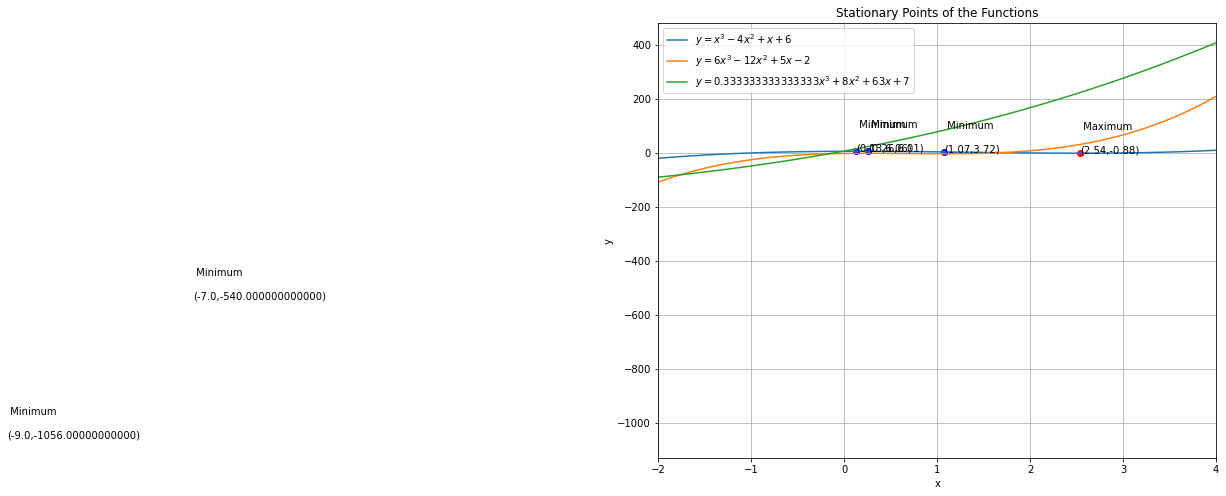

In [47]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol x
x = sp.symbols('x')

# Define the functions
functions = [x**3 - 4*x**2 + x + 6,
             6*x**3 - 12*x**2 + 5*x - 2,
             (1/3)*x**3 + 8*x**2 + 63*x + 7]

# Find the critical points
critical_points = []
for f in functions:
    derivative = sp.diff(f, x)
    critical_points.extend(sp.solve(derivative, x))

# Filter unique critical points
critical_points = list(set(critical_points))

# Find the stationary points (maxima, minima)
stationary_points = []
for point in critical_points:
    second_derivative = sp.diff(sp.diff(functions[0], x), x).subs(x, point)
    if second_derivative != 0:
        if second_derivative > 0:
            type = "Maximum"
        else:
            type = "Minimum"
        stationary_points.append((point, type))

# Convert to float format for plotting
stationary_points = [(float(p), type) for p, type in stationary_points]

# Plot the functions and mark the stationary points
plt.figure(figsize=(10, 8))  # Adjust the figure size
x_vals = np.linspace(-4, 4, 100)
for i, f in enumerate(functions):
    y_vals = [f.subs(x, val) for val in x_vals]
    plt.plot(x_vals, y_vals, label=f'$y = {sp.latex(f)}$')

for point, type in stationary_points:
    plt.scatter(point, functions[0].subs(x, point), color='red' if type == "Maximum" else 'blue')
    plt.text(point, functions[0].subs(x, round(point, 2)), f' {type}\n\n({round(point, 2)},{round(functions[0].subs(x, round(point, 2)), 2)})', fontsize=10)

# Configure the plot
plt.title("Stationary Points of the Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 4)
plt.legend()
plt.grid(True)
plt.show()
